## Observations and Insights 

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
study_data_complete = study_data_complete.drop_duplicates(['Mouse ID' , 'Timepoint'])


# Display the data table for preview

study_data_complete                                                  


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_number = study_data_complete['Mouse ID'].unique()
mouse_number = len(mouse_number)
mouse_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
compare_df = study_data_complete.drop(columns= ['Drug Regimen', 'Sex' , 'Age_months' , 'Weight (g)' , 'Tumor Volume (mm3)', 'Metastatic Sites'])
compare_df['Timepoint'] = compare_df['Timepoint'].astype(str)
compare_df['combined'] = compare_df['Mouse ID'] + compare_df['Timepoint']
compare_df
counts = compare_df.drop_duplicates(['combined'])
counts.count()


Mouse ID     1888
Timepoint    1888
combined     1888
dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_sd = study_data_complete.drop_duplicates(['Mouse ID' , 'Timepoint'])
clean_sd

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_number = clean_sd['Mouse ID'].unique()
mouse_number = len(mouse_number)
mouse_number

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
simple_sd = clean_sd.drop(columns = ['Mouse ID' , 'Sex' , 'Age_months' , 'Weight (g)' , 'Timepoint' , 
                                     'Metastatic Sites'])
drug = 'Drug Regimen'
tumor_vol = 'Tumor Volume (mm3)'

regimen_mean = clean_sd.groupby([drug]).mean()
regimen_median = clean_sd.groupby([drug]).median()
regimen_variance = clean_sd.groupby([drug]).var()
regimen_std = clean_sd.groupby([drug]).std()
regimen_sem = clean_sd.groupby([drug]).sem()

summary = pd.DataFrame()
summary ['Mean'] = regimen_mean.loc[:,tumor_vol]
summary ['Median'] = regimen_median.loc[:,tumor_vol]
summary ['Variance'] = regimen_variance.loc[:,tumor_vol]
summary ['Standard Deviation'] = regimen_std.loc[:,tumor_vol]
summary ['SEM'] = regimen_sem.loc[:,tumor_vol]

summary




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


agg_sd = simple_sd.groupby(drug).agg(['mean', 'median' ,'var' , 'std' , 'sem'])
agg_sd


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

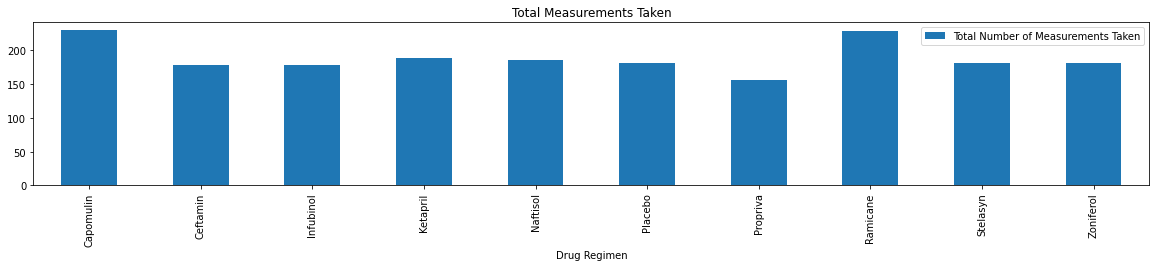

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements = simple_sd.groupby(drug).count()
measurements_df = pd.DataFrame(measurements)
measurements_df = measurements_df.rename(columns = {'Tumor Volume (mm3)' : 'Total Number of Measurements Taken'})

measurements_df.plot(kind="bar", figsize=(20,3))
plt.title("Total Measurements Taken")

plt.show()
plt.tight_layout()


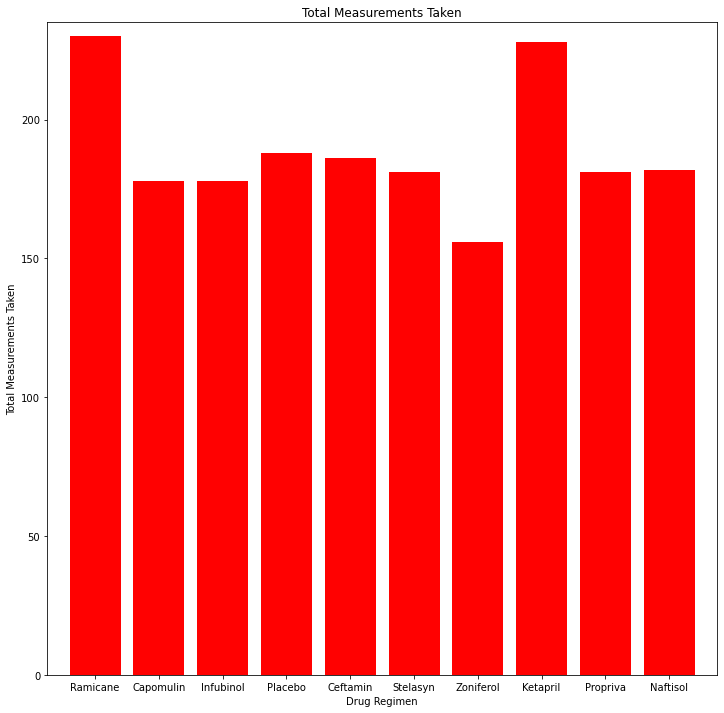

In [79]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

measurements = simple_sd.groupby(drug).count()
measurements_df = pd.DataFrame(measurements)
maximum = measurements.max()
measurements_df
maximum = int(maximum)
drugs = simple_sd['Drug Regimen'].unique()
x_axis = np.arange(0, len(measurements))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.figure(figsize=(12,12))
plt.title("Total Measurements Taken")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements Taken")

plt.xlim(-0.75, len(drugs)-.25)
plt.ylim(0, maximum + 5)

plt.bar(x_axis, measurements_df['Tumor Volume (mm3)'] , facecolor="red", alpha=2, align="center")
plt.xticks(tick_locations,drugs )
plt.show()

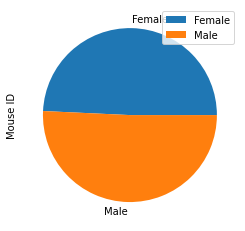

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_sd.groupby('Sex').count()
gender = pd.DataFrame(gender)
gender.plot.pie(y='Mouse ID')

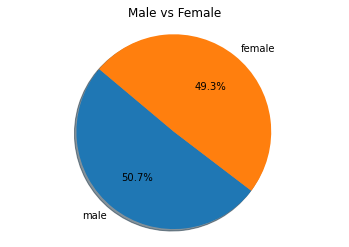

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = clean_sd.groupby('Sex').count()
genders = pd.DataFrame(genders)
genders
gender_count = [genders.iloc[1,0], genders.iloc[0,0]] 
gender_count
gender= ['male' , 'female']
explode = (0,0)
plt.title("Male vs Female")
plt.pie(gender_count, explode=explode, labels=gender,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
best_df = pd.DataFrame()
capo_df = clean_sd.loc[clean_sd['Drug Regimen'] == 'Capomulin']
rami_df = clean_sd.loc[clean_sd['Drug Regimen'] == 'Ramicane']
infu_df = clean_sd.loc[clean_sd['Drug Regimen'] == 'Infubinol']
ceft_df = clean_sd.loc[clean_sd['Drug Regimen'] == 'Ceftamin']
best_df = capo_df
best_df = best_df.append(rami_df)
best_df = best_df.append(infu_df)
best_df = best_df.append(ceft_df)
#best_df = best_df.set_index('Mouse ID')
last_time = best_df.groupby('Mouse ID').max()
last_time = pd.DataFrame(last_time)
#last_time = last_time.drop(columns = ['Drug Regimen', 'Sex', 'Age_months' , 'Weight (g)' , 'Metastatic Sites'])
last_time
best_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_df = last_time.merge(best_df, how='left')
final_tumor_df = final_tumor_df.drop_duplicates('Mouse ID')
final_tumor_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse ID
0,Infubinol,Female,20,23,45,67.973419,2,a203
1,Infubinol,Female,21,25,45,65.525743,1,a251
2,Ceftamin,Female,20,28,45,62.999356,3,a275
3,Ramicane,Male,3,22,45,45.466677,1,NaN
6,Infubinol,Female,6,25,30,57.031862,2,a577
8,Infubinol,Male,8,30,45,66.083066,3,a685
10,Ceftamin,Male,2,30,0,45.000000,0,b447
11,Ceftamin,Female,6,28,25,56.057749,1,b487
13,Ceftamin,Female,12,25,30,55.742829,1,b759
14,Infubinol,Male,11,28,45,72.226731,2,c139


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = best_df['Drug Regimen'].unique()
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = final_tumor_df['Tumor Volume (mm3)']


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(iqr)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

14.699236724999992


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

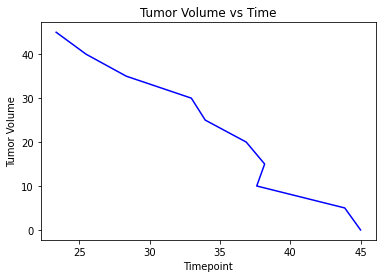

In [71]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = capo_df.loc[capo_df['Mouse ID'] == 's185']

tumor_volume = mouse['Tumor Volume (mm3)']
timepoint = mouse['Timepoint']
plt.title("Tumor Volume vs Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
mouse_plot = plt.plot(tumor_volume, timepoint, color="blue", label="Tumor Size" )


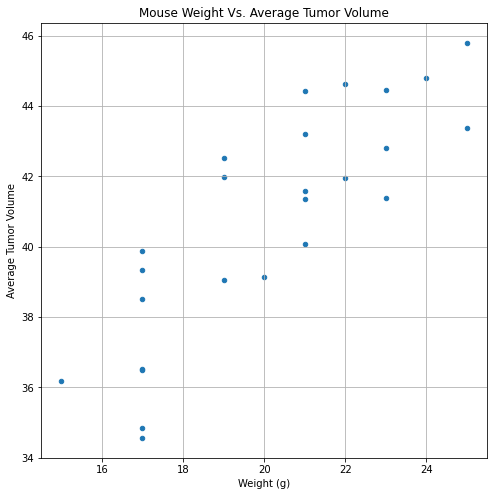

In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_tumor = capo_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
average_tumor = pd.DataFrame(average_tumor)

weight = capo_df.groupby('Mouse ID')['Weight (g)'].mean()
weight = pd.DataFrame(weight)
weight = weight.merge(average_tumor, on='Mouse ID')
weight = weight.rename(columns = {'Tumor Volume (mm3)' :'Average Tumor Volume'})
weight.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume", grid=True, figsize=(8,8),
              title="Mouse Weight Vs. Average Tumor Volume")
plt.show()



## Correlation and Regression

In [69]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = weight.iloc[:,0]
tumor = weight.iloc[:,1]
correlation = st.pearsonr(mouse_weight,tumor)
x_values = weight['Weight (g)']
y_values = weight['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"The correlation between both factors is {round(correlation[0],2)}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

The correlation between both factors is 0.84


'y = 0.95x + 21.55'